In [1]:
import numpy as np
import scipy.linalg as sla
import matplotlib.pyplot as plt
from time import time

from nalger_helper_functions import *

(-0.25, 1.25)

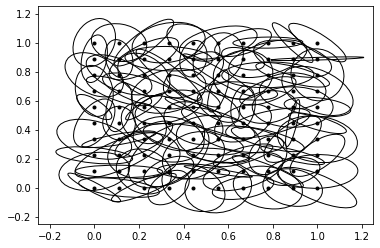

In [2]:
nx = 10
ny = 10
scaling_factor = 0.01
tau = 1.3

X, Y = np.meshgrid(np.linspace(0,1,nx), np.linspace(0,1,nx))
pp = np.vstack([X.reshape(-1), Y.reshape(-1)])
num_ellipsoids = pp.shape[1]
all_mu = list(pp.T)
# all_mu = [np.random.rand(2) for _ in range(num_ellipsoids)]
all_Sigma = list()
for k in range(num_ellipsoids):
    S0 = np.random.randn(2,2)
    all_Sigma.append(scaling_factor * sla.sqrtm(np.dot(S0.T, S0)))

all_points = all_mu
    
for k in range(num_ellipsoids):
    plot_ellipse(all_mu[k], all_Sigma[k], tau)
    plt.plot(all_points[k][0], all_points[k][1], '.k')
    
plt.xlim(-0.25, 1.25)
plt.ylim(-0.25, 1.25)

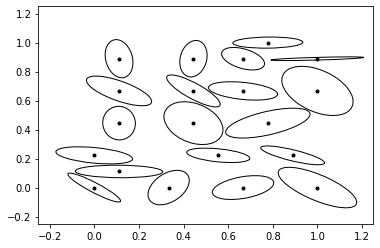

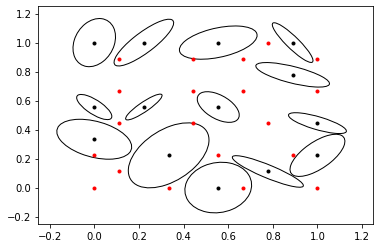

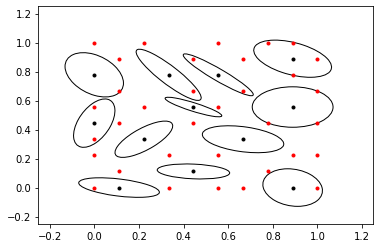

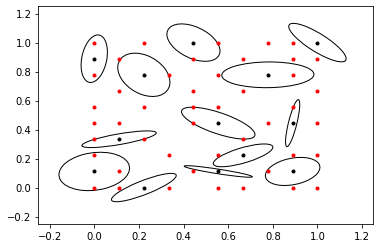

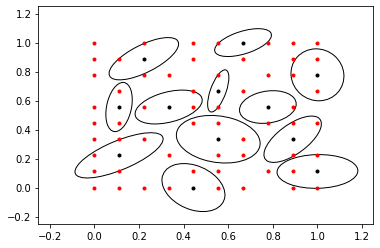

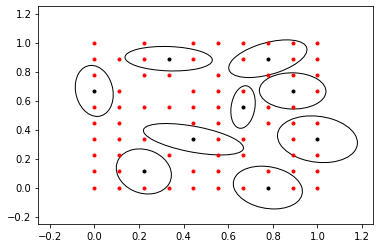

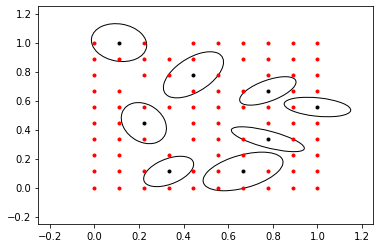

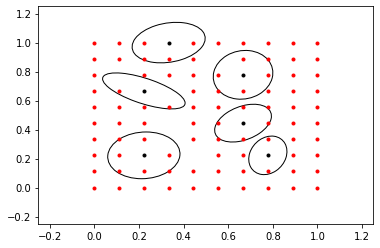

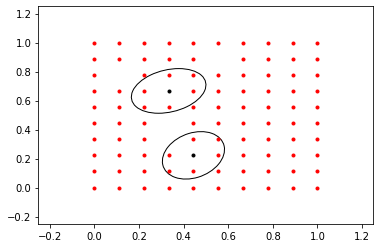

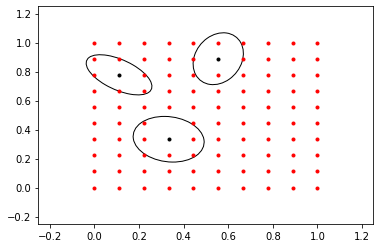

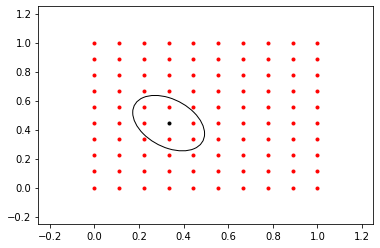

In [3]:
EPB = EllipsoidBatchPicker(all_points, all_mu, all_Sigma, tau)

batch = EPB.pick_batch()
while batch:
#     print('EPB.batches=', EPB.batches)

    plt.figure()
    for b_old in EPB.batches[:-1]:
        for ind_old in b_old:
            plt.plot(all_points[ind_old][0], all_points[ind_old][1], '.r')
    
    for ind in batch:
        plot_ellipse(all_mu[ind], all_Sigma[ind], tau)
        plt.plot(all_points[ind][0], all_points[ind][1], '.k')

    plt.xlim(-0.25, 1.25)
    plt.ylim(-0.25, 1.25)
    
    batch = EPB.pick_batch()

In [4]:
num_ellipsoids = 10000
scaling_factor = 0.005
tau = 1.3
all_mu = [np.random.rand(2) for _ in range(num_ellipsoids)]
all_Sigma = list()
for k in range(num_ellipsoids):
    S0 = np.random.randn(2,2)
    all_Sigma.append(scaling_factor * sla.sqrtm(np.dot(S0.T, S0)))

all_points = all_mu

t = time()
EPB = EllipsoidBatchPicker(all_points, all_mu, all_Sigma, tau)
dt_build = time() - t
print('num_ellipsoids=', num_ellipsoids, ', dt_build=', dt_build)

t = time()
for k in range(25):
    batch = EPB.pick_batch()
dt_batches = time() - t
print('num_ellipsoids=', num_ellipsoids, ', dt_batches=', dt_batches)

num_ellipsoids= 10000 , dt_build= 0.04485774040222168
num_ellipsoids= 10000 , dt_batches= 0.9189047813415527
